## SVM Checker

In [74]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools





def example(num_samples=10, num_features=2, grid_size=20):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    trainer = svm.SVMTrainer(svm.Kernel.linear()) #Приймає на всіх наше ядро
    
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    
    data = np.array([xx, yy])
    
    plt.contourf(
        data,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.8
    )
    
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[ 1.38968395 -0.58599078]
 [-0.09430334 -1.26739312]
 [-0.4839171   0.95890211]
 [-0.50724003 -1.45189974]
 [-0.06619633 -0.43278645]
 [ 0.06171965 -1.01255632]
 [-0.03854951 -1.11679227]
 [ 0.99409032  0.16049795]
 [-0.63423793  0.93577398]
 [ 1.31453977  1.60552155]]
     pcost       dcost       gap    pres   dres
 0: -2.9358e+00 -6.2474e+00  3e+01  5e+00  2e+00
 1: -3.0466e+00 -5.3201e+00  6e+00  8e-01  3e-01
 2: -3.2642e+00 -3.6114e+00  6e-01  6e-02  2e-02
 3: -3.5236e+00 -3.5381e+00  2e-02  8e-04  3e-04
 4: -3.5321e+00 -3.5322e+00  2e-04  8e-06  3e-06
 5: -3.5321e+00 -3.5321e+00  2e-06  8e-08  3e-08
Optimal solution found.


TypeError: Input must be a 2D array.

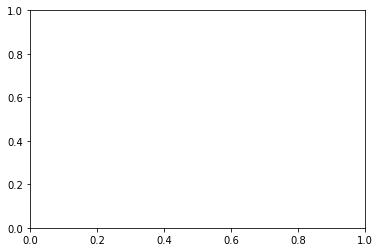

In [75]:
example()